In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0].shape

(32, 32, 3)

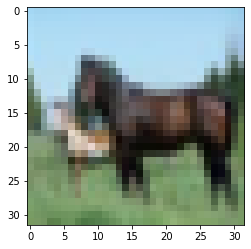

In [9]:
plt.imshow(X_train[12])

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
Y_cat_train = to_categorical(Y_train,10)
Y_cat_test = to_categorical(Y_test,10)    

In [13]:
Y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [17]:
from tensorflow.keras.callbacks import EarlyStopping 

In [18]:
early_stop=EarlyStopping(monitor='val_loss', patience=2)

In [19]:
model.fit(X_train,Y_cat_train,epochs=15,validation_data=(X_test,Y_cat_test),
         callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 48s 958us/sample - loss: 1.5006 - acc: 0.4566 - val_loss: 1.2913 - val_acc: 0.5438
Epoch 2/15
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.1669 - acc: 0.5882 - val_loss: 1.1219 - val_acc: 0.6063
Epoch 3/15
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.0221 - acc: 0.6432 - val_loss: 1.0860 - val_acc: 0.6267
Epoch 4/15
50000/50000 [==============================] - 49s 979us/sample - loss: 0.9134 - acc: 0.6804 - val_loss: 1.0270 - val_acc: 0.6447
Epoch 5/15
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8272 - acc: 0.7120 - val_loss: 0.9647 - val_acc: 0.6729
Epoch 6/15
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.7550 - acc: 0.7366 - val_loss: 0.9574 - val_acc: 0.6779
Epoch 7/15
50000/50000 [==============================] - 48s 964us/sample - loss: 0.6827 - acc: 0.7612 - val_lo

In [20]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,acc,val_loss,val_acc
0,1.500552,0.45658,1.291298,0.5438
1,1.166850,0.58820,1.121863,0.6063
2,1.022105,0.64320,1.086025,0.6267
3,0.913391,0.68036,1.026969,0.6447
4,0.827207,0.71204,0.964747,0.6729
5,0.754952,0.73660,0.957354,0.6779
6,0.682742,0.76118,0.953651,0.6802
7,0.617604,0.78424,0.952692,0.6815
8,0.566292,0.79990,1.013230,0.6800
9,0.509678,0.82246,1.062319,0.6733


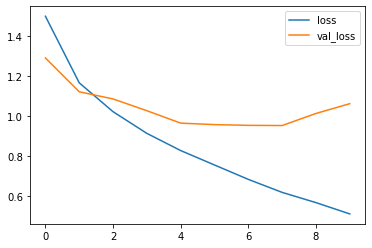

In [21]:
metrics[['loss','val_loss']].plot()

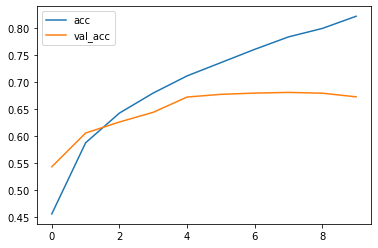

In [22]:
metrics[['acc','val_acc']].plot()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
predictions=model.predict_classes(X_test)

In [30]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1000
           1       0.82      0.77      0.79      1000
           2       0.55      0.60      0.57      1000
           3       0.45      0.57      0.50      1000
           4       0.60      0.64      0.62      1000
           5       0.60      0.53      0.56      1000
           6       0.68      0.80      0.73      1000
           7       0.78      0.69      0.74      1000
           8       0.80      0.76      0.78      1000
           9       0.79      0.73      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000



In [37]:
my_image=X_test[16]

Text(0.5, 1.0, '[5]')

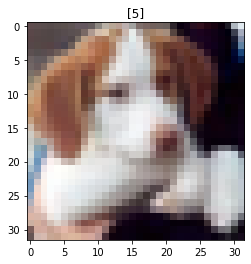

In [38]:
plt.imshow(my_image)
plt.title(str(Y_test[16]))

In [39]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)